<a href="https://colab.research.google.com/github/joaovictor912/MundialPrevis-oRF/blob/main/MundialPrevis%C3%A3oRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão Mundial de Clubes 2025 utilizando Random Forest

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random

!pip install pandas scikit-learn

1 Passo - Preparação dos Dados

In [12]:
random.seed(42)


teams = [
    'Palmeiras', 'Porto', 'Al Ahly', 'Inter Miami', 'PSG', 'Atlético de Madrid',
    'Botafogo', 'Seattle Sounders', 'Bayern de Munique', 'Auckland City',
    'Boca Juniors', 'Benfica', 'Flamengo', 'Espérance de Tunis', 'Chelsea',
    'León', 'River Plate', 'Urawa Red Diamonds', 'Monterrey', 'Inter de Milão',
    'Fluminense', 'Borussia Dortmund', 'Ulsan HD', 'Mamelodi Sundowns',
    'Manchester City', 'Wydad Casablanca', 'Al Ain', 'Juventus', 'Real Madrid',
    'Al Hilal', 'Pachuca', 'Red Bull Salzburg'
]

#GRUPOS
grupos = {
    'A': ['Palmeiras', 'Porto', 'Al Ahly', 'Inter Miami'],
    'B': ['PSG', 'Atlético de Madrid', 'Botafogo', 'Seattle Sounders'],
    'C': ['Bayern de Munique', 'Auckland City', 'Boca Juniors', 'Benfica'],
    'D': ['Flamengo', 'Espérance de Tunis', 'Chelsea', 'León'],
    'E': ['River Plate', 'Urawa Red Diamonds', 'Monterrey', 'Inter de Milão'],
    'F': ['Fluminense', 'Borussia Dortmund', 'Ulsan HD', 'Mamelodi Sundowns'],
    'G': ['Manchester City', 'Wydad Casablanca', 'Al Ain', 'Juventus'],
    'H': ['Real Madrid', 'Al Hilal', 'Pachuca', 'Red Bull Salzburg']
}


rankings_historicos = {
    'Manchester City': [2080, 2090, 2100, 2120, 2130], 'Real Madrid': [2070, 2085, 2095, 2110, 2125], 'Bayern de Munique': [2060, 2075, 2080, 2100, 2110],
    'PSG': [2000, 2020, 2030, 2040, 2050], 'Inter de Milão': [1980, 1990, 2010, 2030, 2040], 'Chelsea': [1990, 2010, 1980, 1970, 1960],
    'Palmeiras': [1950, 1970, 1990, 2000, 2010], 'Flamengo': [1960, 1980, 1985, 1995, 2005], 'River Plate': [1930, 1940, 1950, 1960, 1970],
    'Borussia Dortmund': [1920, 1930, 1940, 1950, 1955], 'Atlético de Madrid': [1940, 1950, 1945, 1935, 1930], 'Juventus': [1960, 1950, 1930, 1920, 1910],
    'Benfica': [1900, 1910, 1925, 1935, 1945], 'Boca Juniors': [1910, 1920, 1930, 1920, 1915], 'Al Hilal': [1800, 1820, 1840, 1860, 1880],
    'Monterrey': [1815, 1805, 1825, 1820, 1830], 'Pachuca': [1790, 1800, 1810, 1815, 1820], 'Red Bull Salzburg': [1850, 1860, 1870, 1850, 1840],
    'Al Ahly': [1800, 1810, 1815, 1825, 1835], 'Seattle Sounders': [1770, 1780, 1785, 1790, 1795], 'Urawa Red Diamonds': [1700, 1710, 1720, 1730, 1740],
    'Wydad Casablanca': [1720, 1730, 1725, 1735, 1745], 'Mamelodi Sundowns': [1680, 1690, 1700, 1710, 1720], 'Espérance de Tunis': [1690, 1700, 1695, 1705, 1715],
    'Al Ain': [1650, 1660, 1670, 1680, 1690], 'León': [1750, 1740, 1760, 1755, 1765], 'Auckland City': [1550, 1560, 1570, 1580, 1590],
    'Fluminense': [1930, 1950, 1980, 1985, 1990], 'Porto': [1910, 1930, 1920, 1940, 1950], 'Ulsan HD': [1720, 1730, 1750, 1760, 1770],
    'Inter Miami': [1650, 1700, 1750, 1800, 1850], 'Botafogo': [1880, 1900, 1920, 1930, 1940] # Dados adicionados
}
stats_plausiveis = {
    'Manchester City': {'VM': 1270, 'GP': 2.5, 'GS': 0.8}, 'Real Madrid': {'VM': 1040, 'GP': 2.3, 'GS': 0.9}, 'Bayern de Munique': {'VM': 929, 'GP': 2.8, 'GS': 1.1},
    'PSG': {'VM': 1020, 'GP': 2.6, 'GS': 0.9}, 'Inter de Milão': {'VM': 622, 'GP': 2.2, 'GS': 0.7}, 'Chelsea': {'VM': 928, 'GP': 1.8, 'GS': 1.2},
    'Palmeiras': {'VM': 209, 'GP': 1.8, 'GS': 0.8}, 'Flamengo': {'VM': 164, 'GP': 1.9, 'GS': 0.9}, 'River Plate': {'VM': 102, 'GP': 1.7, 'GS': 0.7},
    'Borussia Dortmund': {'VM': 540, 'GP': 2.4, 'GS': 1.3}, 'Atlético de Madrid': {'VM': 455, 'GP': 1.9, 'GS': 0.9}, 'Juventus': {'VM': 490, 'GP': 1.8, 'GS': 0.8},
    'Benfica': {'VM': 367, 'GP': 2.5, 'GS': 0.7}, 'Boca Juniors': {'VM': 86, 'GP': 1.5, 'GS': 0.6}, 'Al Hilal': {'VM': 242, 'GP': 2.9, 'GS': 0.6},
    'Monterrey': {'VM': 90, 'GP': 1.7, 'GS': 1.0}, 'Pachuca': {'VM': 58, 'GP': 1.9, 'GS': 1.1}, 'Red Bull Salzburg': {'VM': 212, 'GP': 2.8, 'GS': 0.6},
    'Al Ahly': {'VM': 32, 'GP': 2.1, 'GS': 0.5}, 'Seattle Sounders': {'VM': 51, 'GP': 1.5, 'GS': 1.1}, 'Urawa Red Diamonds': {'VM': 26, 'GP': 1.9, 'GS': 0.8},
    'Wydad Casablanca': {'VM': 20, 'GP': 1.8, 'GS': 0.6}, 'Mamelodi Sundowns': {'VM': 33, 'GP': 2.2, 'GS': 0.4}, 'Espérance de Tunis': {'VM': 18, 'GP': 2.0, 'GS': 0.3},
    'Al Ain': {'VM': 33, 'GP': 2.4, 'GS': 0.8}, 'León': {'VM': 43, 'GP': 1.6, 'GS': 1.5}, 'Auckland City': {'VM': 5, 'GP': 3.1, 'GS': 0.5},
    'Fluminense': {'VM': 110, 'GP': 1.9, 'GS': 1.0}, 'Porto': {'VM': 310, 'GP': 2.4, 'GS': 0.8}, 'Ulsan HD': {'VM': 21, 'GP': 2.2, 'GS': 0.7},
    'Inter Miami': {'VM': 90, 'GP': 1.8, 'GS': 1.4}, 'Botafogo': {'VM': 100, 'GP': 1.8, 'GS': 0.9}
}
confederacoes = {
    'Palmeiras': 'CONMEBOL', 'Flamengo': 'CONMEBOL', 'River Plate': 'CONMEBOL', 'Boca Juniors': 'CONMEBOL', 'Fluminense': 'CONMEBOL', 'Botafogo': 'CONMEBOL',
    'Monterrey': 'CONCACAF', 'Pachuca': 'CONCACAF', 'León': 'CONCACAF', 'Seattle Sounders': 'CONCACAF', 'Inter Miami': 'CONCACAF',
    'PSG': 'UEFA', 'Atlético de Madrid': 'UEFA', 'Bayern de Munique': 'UEFA', 'Chelsea': 'UEFA', 'Inter de Milão': 'UEFA',
    'Borussia Dortmund': 'UEFA', 'Juventus': 'UEFA', 'Benfica': 'UEFA', 'Real Madrid': 'UEFA', 'Manchester City': 'UEFA',
    'Red Bull Salzburg': 'UEFA', 'Porto': 'UEFA',
    'Al Ahly': 'CAF', 'Wydad Casablanca': 'CAF', 'Mamelodi Sundowns': 'CAF', 'Espérance de Tunis': 'CAF',
    'Al Hilal': 'AFC', 'Urawa Red Diamonds': 'AFC', 'Ulsan HD': 'AFC', 'Al Ain': 'AFC',
    'Auckland City': 'OFC'
}
fatores_liga = {'UEFA': 1.0, 'CONMEBOL': 0.90, 'CONCACAF': 0.75, 'AFC': 0.70, 'CAF': 0.65, 'OFC': 0.45}

#MONTAGEM DO DATAFRAME
df_teams = pd.DataFrame.from_dict(stats_plausiveis, orient='index')
df_teams.rename(columns={'VM': 'Valor_Mercado_EUR(M)', 'GP': 'Media_Gols_Liga', 'GS': 'Media_Gols_Sofridos_Liga'}, inplace=True)
for ano in range(2021, 2026): df_teams[f'Ranking_{ano}'] = [rankings_historicos[time][ano - 2021] for time in df_teams.index]
pesos = [0.10, 0.15, 0.20, 0.25, 0.30]
df_teams['Ranking_Ponderado'] = np.average(df_teams.loc[:, 'Ranking_2021':'Ranking_2025'], axis=1, weights=pesos)
df_teams['Confederacao'] = df_teams.index.map(confederacoes)
df_teams['Fator_Liga'] = df_teams['Confederacao'].map(fatores_liga)
df_teams['Gols_Pro_Ajustados'] = df_teams['Media_Gols_Liga'] * df_teams['Fator_Liga']
df_teams['Gols_Sofridos_Ajustados'] = df_teams['Media_Gols_Sofridos_Liga'] / df_teams['Fator_Liga']
features_finais = ['Ranking_Ponderado', 'Valor_Mercado_EUR(M)', 'Gols_Pro_Ajustados', 'Gols_Sofridos_Ajustados']
df_para_modelo = df_teams[features_finais]

scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_para_modelo), index=df_para_modelo.index, columns=df_para_modelo.columns)
df_normalizado['Gols_Sofridos_Ajustados'] = 1 - df_normalizado['Gols_Sofridos_Ajustados']
df_teams['Power_Score'] = df_normalizado.sum(axis=1)
print("Passo concluído!\n")

Dados preparados para os 32 times!

Passo 1.5: Criando 'Power Score' para cada time...
Passo concluído!



Passo 2 — Funções da simulação

In [13]:
def criar_features(df_partidas, df_stats):
    X, y = [], []
    for _, row in df_partidas.iterrows():
        stats_a = df_stats.loc[row['Time_A']]
        stats_b = df_stats.loc[row['Time_B']]
        features = (stats_a - stats_b).values
        X.append(features)
        y.append(row['Resultado'])
    return np.array(X), np.array(y)
def prever_partida(time_a, time_b, modelo, df_stats):
    stats_a = df_stats.loc[time_a]; stats_b = df_stats.loc[time_b]
    feature_vector = (stats_a - stats_b).values.reshape(1, -1)
    probabilidades = modelo.predict_proba(feature_vector)[0]
    classes = modelo.classes_
    resultado = np.random.choice(classes, p=probabilidades)
    if resultado == 0:
        prob_vitoria_a = probabilidades[list(classes).index(1)]; prob_vitoria_b = probabilidades[list(classes).index(-1)]
        return time_a if prob_vitoria_a > prob_vitoria_b else time_b
    elif resultado == 1: return time_a
    else: return time_b
def simular_grupo(times_grupo, modelo, df_stats):
    pontos = {time: 0 for time in times_grupo}
    for i in range(len(times_grupo)):
        for j in range(i + 1, len(times_grupo)):
            time_a, time_b = times_grupo[i], times_grupo[j]
            stats_a = df_stats.loc[time_a]; stats_b = df_stats.loc[time_b]
            feature_vector = (stats_a - stats_b).values.reshape(1, -1)
            probabilidades = modelo.predict_proba(feature_vector)[0]
            resultado = np.random.choice(modelo.classes_, p=probabilidades)
            if resultado == 0: pontos[time_a] += 1; pontos[time_b] += 1
            elif resultado == 1: pontos[time_a] += 3
            else: pontos[time_b] += 3
    classificados_do_grupo = sorted(pontos.items(), key=lambda x: (x[1], df_teams.loc[x[0], 'Power_Score']), reverse=True)
    return [time for time, _ in classificados_do_grupo[:2]]
def simular_mata_mata(times_classificados, modelo, df_stats):
    rodada = list(times_classificados); random.shuffle(rodada)
    while len(rodada) > 1:
        vencedores = []
        for i in range(0, len(rodada), 2): vencedores.append(prever_partida(rodada[i], rodada[i+1], modelo, df_stats))
        rodada = vencedores
    return rodada[0]
def simular_torneio(modelo, df_stats, grupos_fixos):
    classificados_geral = []
    for _, times_do_grupo in grupos_fixos.items():
        if times_do_grupo:
             classificados_geral += simular_grupo(times_do_grupo, modelo, df_stats)
    campeao = simular_mata_mata(classificados_geral, modelo, df_stats)
    return campeao

Passo 3 — Treinamento

In [14]:
training_matches = []
for i in range(1000):
    a, b = random.sample(teams, 2)
    power_diff = df_teams.loc[a, 'Power_Score'] - df_teams.loc[b, 'Power_Score']
    prob_vitoria_a = 1 / (1 + np.exp(-power_diff))
    prob_vitoria_b = 1 - prob_vitoria_a
    prob_empate = 0.25
    prob_vitoria_a_final = prob_vitoria_a * (1 - prob_empate)
    prob_vitoria_b_final = prob_vitoria_b * (1 - prob_empate)
    resultado = np.random.choice([1, -1, 0], p=[prob_vitoria_a_final, prob_vitoria_b_final, prob_empate])
    training_matches.append({'Time_A': a, 'Time_B': b, 'Resultado': resultado})
df_train = pd.DataFrame(training_matches)
X_train, y_train = criar_features(df_train, df_para_modelo)
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)
print("Modelo treinado com sucesso!\n")

Modelo treinado com sucesso!



Passo 4 — Simulação

In [19]:
NUM_SIMULACOES = 100
campeoes = []
for i in range(NUM_SIMULACOES):
    campeao = simular_torneio(model, df_para_modelo, grupos) # Passando os grupos fixos
    campeoes.append(campeao)
    if (i + 1) % (NUM_SIMULACOES / 10) == 0: print(f"Simulação {i + 1}/{NUM_SIMULACOES} concluída...")
contagem_campeoes = Counter(campeoes)
df_resultados = pd.DataFrame(contagem_campeoes.items(), columns=['Time', 'Títulos'])
df_resultados['Probabilidade_%'] = (df_resultados['Títulos'] / NUM_SIMULACOES) * 100
df_resultados = df_resultados.sort_values(by='Títulos', ascending=False).reset_index(drop=True)
print("\nRESULTADO DA SIMULAÇÃO")
print(df_resultados)
print("\n")

Simulação 10/100 concluída...
Simulação 20/100 concluída...
Simulação 30/100 concluída...
Simulação 40/100 concluída...
Simulação 50/100 concluída...
Simulação 60/100 concluída...
Simulação 70/100 concluída...
Simulação 80/100 concluída...
Simulação 90/100 concluída...
Simulação 100/100 concluída...

RESULTADO DA SIMULAÇÃO
                 Time  Títulos  Probabilidade_%
0                 PSG       44             44.0
1     Manchester City       16             16.0
2      Inter de Milão       10             10.0
3   Bayern de Munique       10             10.0
4         Real Madrid        6              6.0
5             Benfica        5              5.0
6             Chelsea        5              5.0
7               Porto        2              2.0
8            Flamengo        1              1.0
9  Atlético de Madrid        1              1.0




Passo 5 — Gráficos

/tmp/ipython-input-1798750721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Títulos', y='Time', data=df_resultados.head(15), palette='viridis')


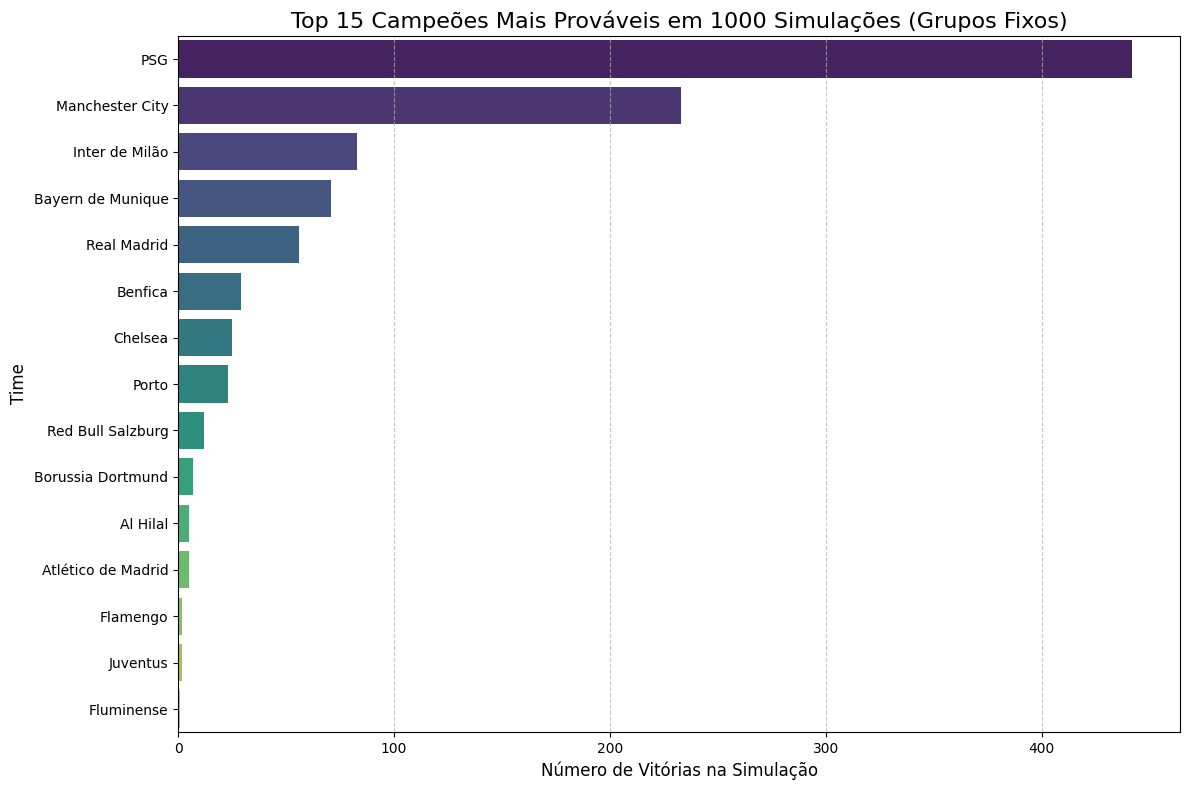


Análise completa!


In [16]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Títulos', y='Time', data=df_resultados.head(15), palette='viridis')
plt.title(f'Top 15 Campeões Mais Prováveis em {NUM_SIMULACOES} Simulações (Grupos Fixos)', fontsize=16)
plt.xlabel('Número de Vitórias na Simulação', fontsize=12)
plt.ylabel('Time', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\nAnálise completa!")